In [114]:
import sys
sys.path.append('../utils')  

from font import set_korean_font
set_korean_font()

In [115]:
import pandas as pd

#지역별 신재생 에너지 발전량 
df = pd.read_excel('../Data/지역별 신재생 에너지 발전량.xlsx')

print(df.head())


     연도 광역지자체  신재생에너지 합계  재생에너지 합계  신에너지 합계  신재생에너지공급비중     태양광     풍력     수력  \
0  2023    서울     755498    361266   394232        1.25  272765    184    334   
1  2023    부산     738393    421541   316852        1.22  366024     63    127   
2  2023    대구     560890    544440    16450        0.93  497336  16525  14033   
3  2023    인천    1966319    574288  1392031        3.26  267782  24693  13477   
4  2023    광주     598721    418128   180593        0.99  404724      7   5028   

  해양     바이오  재생폐기물     연료전지 IGCC  
0  -   27069  60915   394232    -  
1  -   16435  38893   316852    -  
2  -   10691   5854    16450    -  
3  -  258055  10281  1392031    -  
4  -    2001   6367   180593    -  


In [116]:
# 시도명 → 코드 매핑 (key와 value를 바꿈)
sido_codes = {
    "서울": "11",
    "부산": "26",
    "대구": "27",
    "인천": "28",
    "광주": "29",
    "대전": "30",
    "울산": "31",
    "세종": "36",
    "경기": "41",
    "강원": "51",
    "충북": "43",
    "충남": "44",
    "전북": "52",
    "전남": "46",
    "경북": "47",
    "경남": "48",
    "제주": "50"
}

df['시도코드'] = df['광역지자체'].map(sido_codes)
print(df['시도코드'])


0     11
1     26
2     27
3     28
4     29
5     30
6     31
7     36
8     41
9     51
10    43
11    44
12    52
13    46
14    47
15    48
16    50
17    11
18    26
19    27
20    28
21    29
22    30
23    31
24    36
25    41
26    51
27    43
28    44
29    52
30    46
31    47
32    48
33    50
34    11
35    26
36    27
37    28
38    29
39    30
40    31
41    36
42    41
43    51
44    43
45    44
46    52
47    46
48    47
49    48
50    50
Name: 시도코드, dtype: object


In [117]:
# '-'를 NaN으로, 콤마 제거 후 숫자형으로 변환
for col in df.columns[2:]:
    df[col] = df[col].astype(str).str.replace('-', '0').str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 결측치 확인
print(df.isnull().sum())

연도            0
광역지자체         0
신재생에너지 합계     0
재생에너지 합계      0
신에너지 합계       0
신재생에너지공급비중    0
태양광           0
풍력            0
수력            0
해양            0
바이오           0
재생폐기물         0
연료전지          0
IGCC          0
시도코드          0
dtype: int64


In [118]:
print(df['연도'].unique())
print(df.columns)


[2023 2022 2021]
Index(['연도', '광역지자체', '신재생에너지 합계', '재생에너지 합계', '신에너지 합계', '신재생에너지공급비중', '태양광',
       '풍력', '수력', '해양', '바이오', '재생폐기물', '연료전지', 'IGCC', '시도코드'],
      dtype='object')


1) 연도별 광역지자체별 신재생어너지 합계 추세

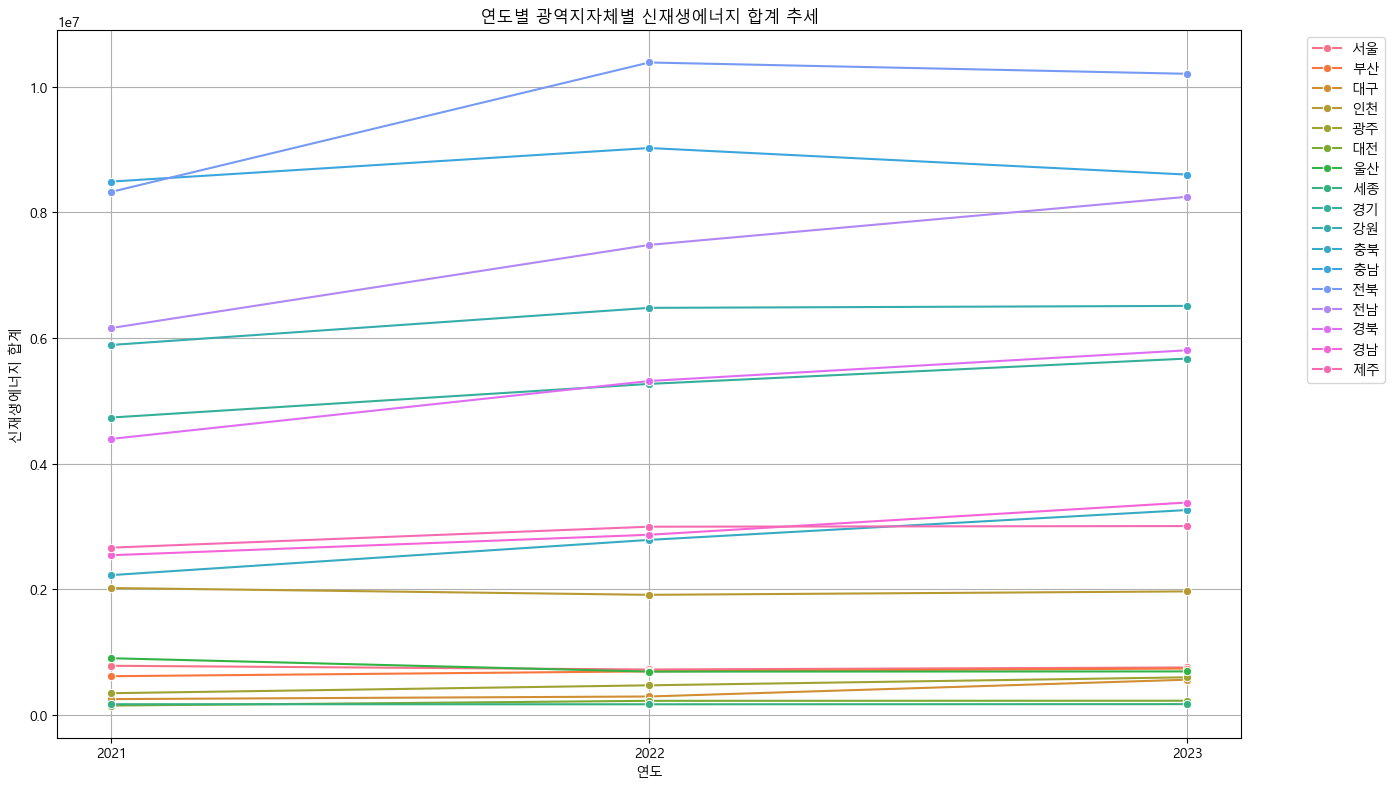

In [119]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

# 연도 정수형 보장
df["연도"] = df["연도"].astype(int)

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="연도", y="신재생에너지 합계", hue="광역지자체", marker="o")

plt.title("연도별 광역지자체별 신재생에너지 합계 추세")
plt.xlabel("연도")
plt.ylabel("신재생에너지 합계")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1)) #2021 2022 2023 이렇게 3개만 x축에 있도록
plt.grid(True)
plt.tight_layout()
plt.show()

2) 연도별 광역지자체별 신재생 에너지 공급비중

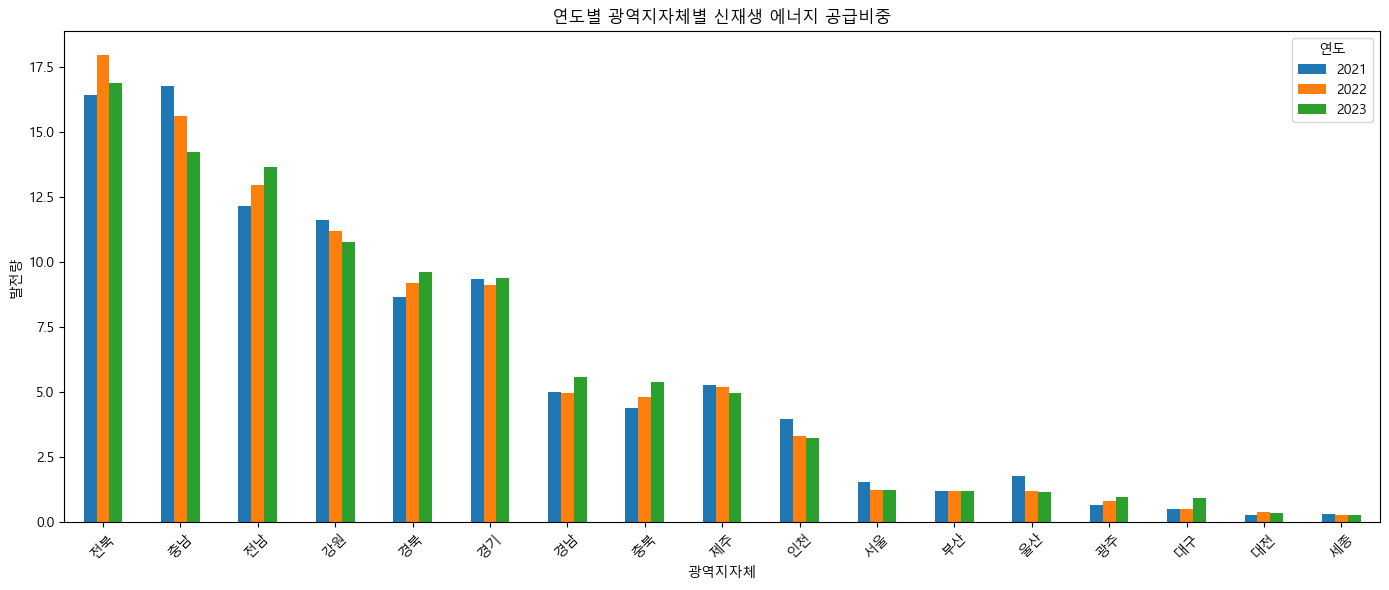

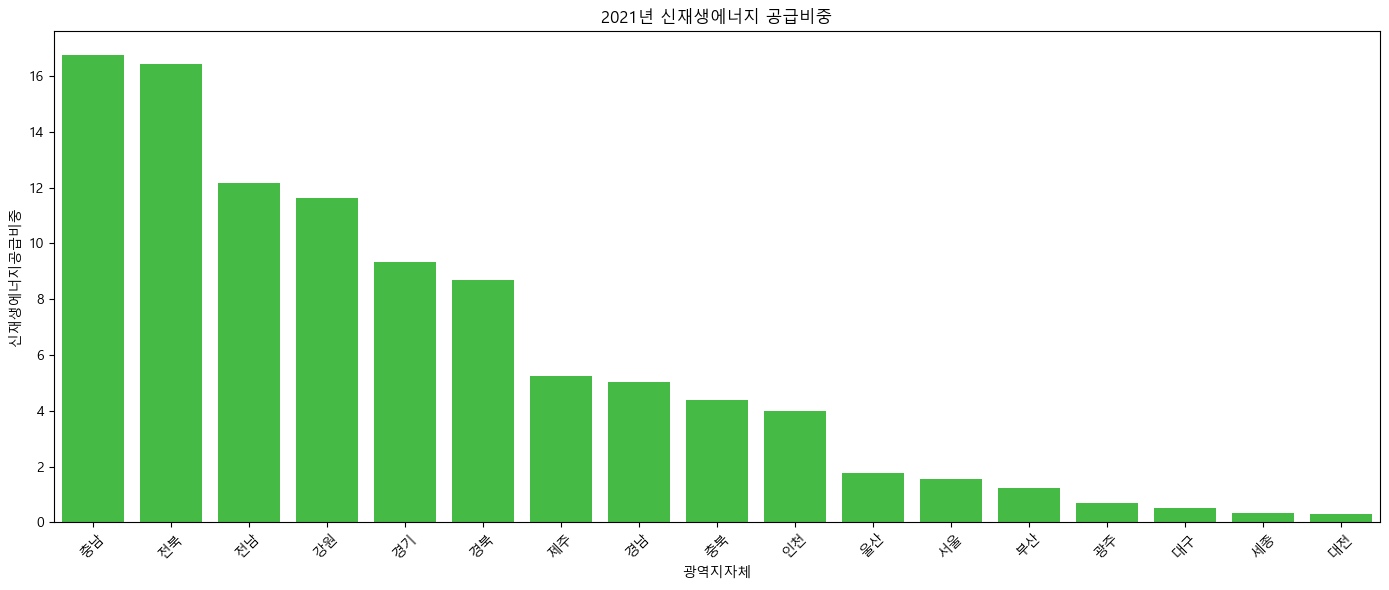

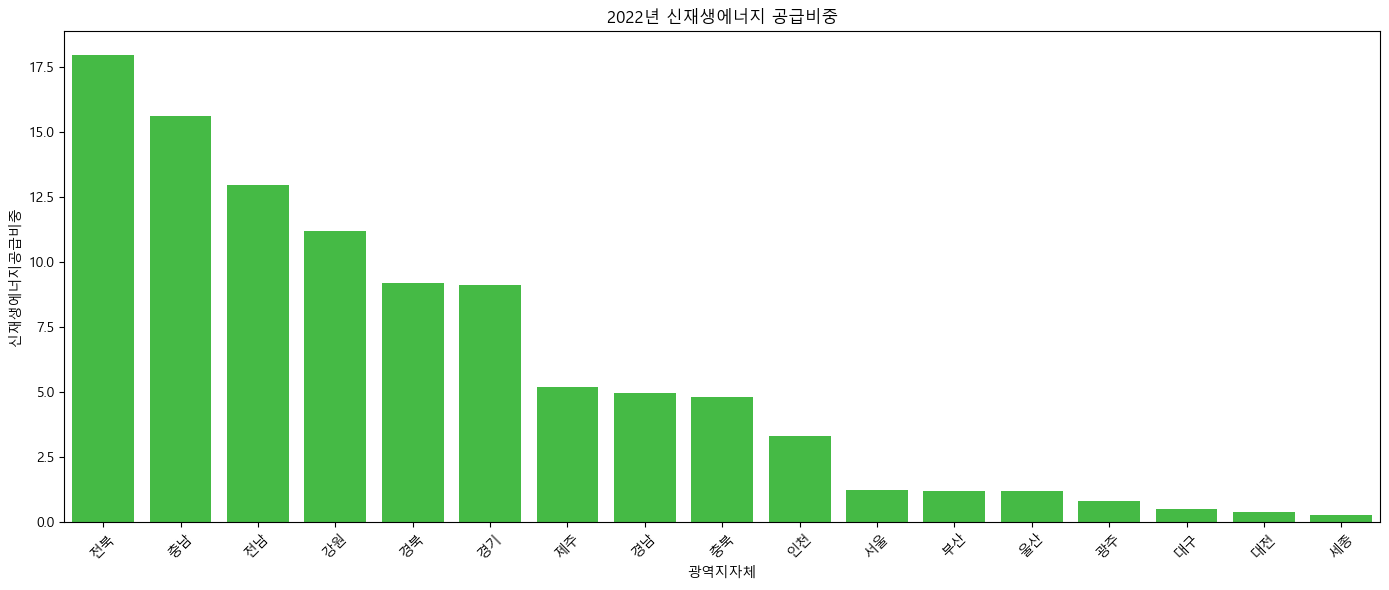

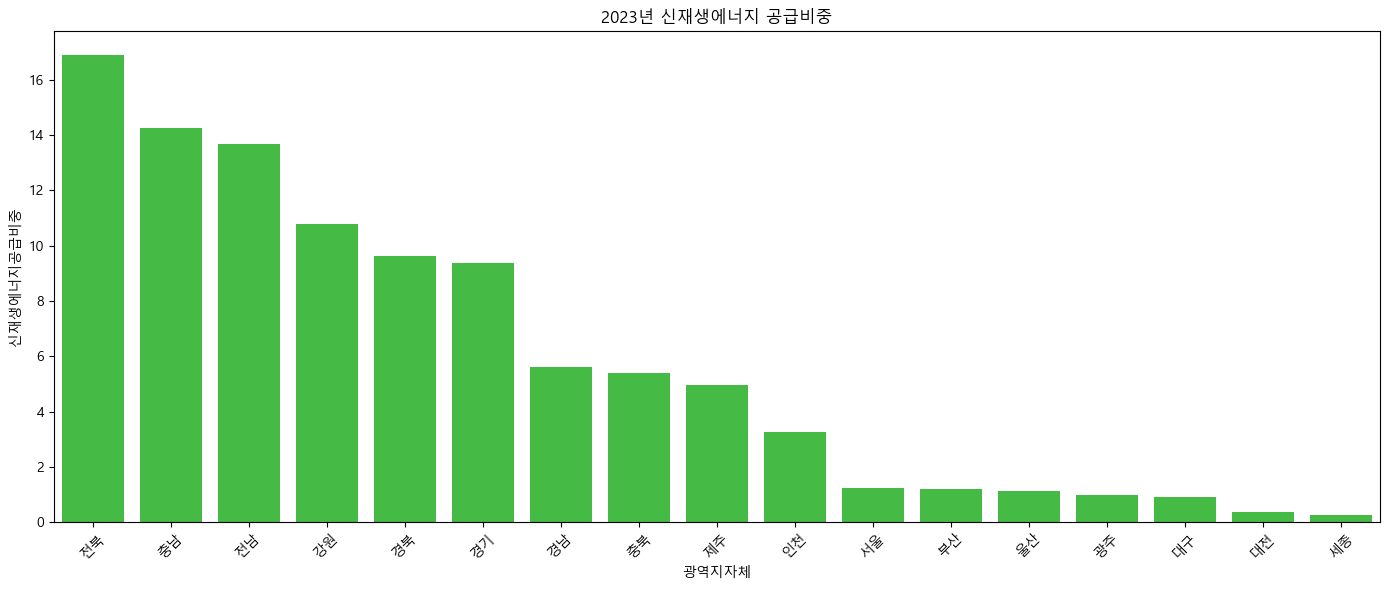

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
#3년동안 광역 지자체별 신재생 에너지 공급 비중
pivot_solar = df.pivot(index='광역지자체', columns='연도', values='신재생에너지공급비중')
pivot_solar = pivot_solar.sort_values(by=2023, ascending=False)
pivot_solar.plot(kind='bar', figsize=(14, 6), title='연도별 광역지자체별 신재생 에너지 공급비중')
plt.ylabel("발전량")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2021을 기준으로 그림 하나
plt.figure(figsize=(14, 6))
sns.barplot(x="광역지자체", y="신재생에너지공급비중", data=df[df['연도'] == 2021].sort_values(by='신재생에너지공급비중', ascending=False), color='limegreen')
plt.title('2021년 신재생에너지 공급비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2022을 기준으로 그림 하나
plt.figure(figsize=(14, 6))
sns.barplot(x="광역지자체", y="신재생에너지공급비중", data=df[df['연도'] == 2022].sort_values(by='신재생에너지공급비중', ascending=False), color='limegreen')
plt.title('2022년 신재생에너지 공급비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2023을 기준으로 그림 하나
plt.figure(figsize=(14, 6))
sns.barplot(x="광역지자체", y="신재생에너지공급비중", data=df[df['연도'] == 2023].sort_values(by='신재생에너지공급비중', ascending=False), color='limegreen')
plt.title('2023년 신재생에너지 공급비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3) 연도별 에너지원별 발전량 추이 (전국 기준)

           태양광       풍력       수력      해양       바이오   재생폐기물     연료전지     IGCC
연도                                                                          
2021  24717622  3180019  3057210  454980  11788066  470619  4798121  2190755
2022  30726259  3369457  3544867  423843  11927593  413530  5409624  1964827
2023  33236447  3392165  3718016  437566  11918038  443769  6257348   996517


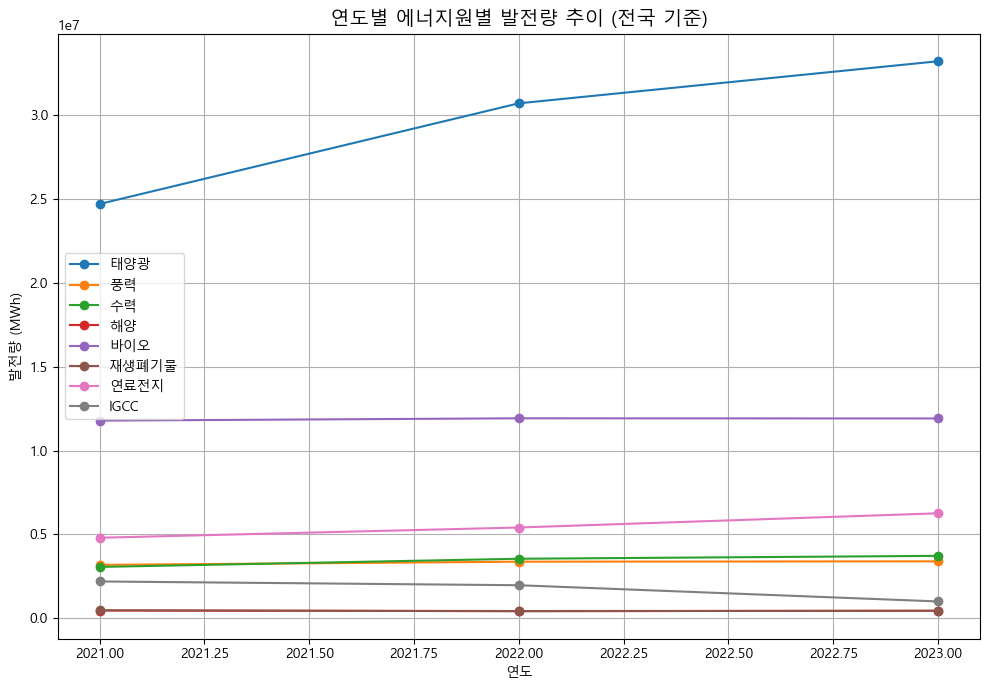

In [121]:
# 신재생 에너지
energy_cols = ['태양광', '풍력', '수력', '해양', '바이오', '재생폐기물', '연료전지', 'IGCC']

yearly_totals = df.groupby('연도')[energy_cols].sum()
print(yearly_totals)

plt.figure(figsize=(10, 7))
for col in energy_cols:
    plt.plot(yearly_totals.index, yearly_totals[col], label=col, marker='o')

plt.title('연도별 에너지원별 발전량 추이 (전국 기준)', fontsize=14)
plt.xlabel('연도')
plt.ylabel('발전량 (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



4) 전국 연도별 특정 에너지 발전량 합계-지도시각화

In [122]:
import pandas as pd
import json

# 로컬에 있는 geoJSON 파일 로드
file_path = "../Data/TL_SCCO_CTPRVN.json"

with open(file_path, 'r', encoding='utf-8') as f:
    geo_json_data = json.load(f)

# GeoJSON 구조
properties = [f['properties'] for f in geo_json_data['features']]
geojson_df = pd.DataFrame(properties)
print(geojson_df) 

print(df)



   CTPRVN_CD         CTP_ENG_NM CTP_KOR_NM
0         51         Gangwon-do    강원특별자치도
1         41        Gyeonggi-do        경기도
2         48   Gyeongsangnam-do       경상남도
3         47   Gyeongsangbuk-do       경상북도
4         29            Gwangju      광주광역시
5         27              Daegu      대구광역시
6         30            Daejeon      대전광역시
7         26              Busan      부산광역시
8         11              Seoul      서울특별시
9         36          Sejong-si    세종특별자치시
10        31              Ulsan      울산광역시
11        28            Incheon      인천광역시
12        46        Jellanam-do       전라남도
13        52       Jeollabuk-do       전라북도
14        50            Jeju-do    제주특별자치도
15        44  Chungcheongnam-do       충청남도
16        43  Chungcheongbuk-do       충청북도
      연도 광역지자체  신재생에너지 합계  재생에너지 합계  신에너지 합계  신재생에너지공급비중      태양광      풍력  \
0   2023    서울     755498    361266   394232        1.25   272765     184   
1   2023    부산     738393    421541   316852        1.22   366024      6

In [130]:
import folium
from IPython.display import display

center = [36.5, 127.8]
energy_sources = ['태양광', '풍력', '수력', '해양', '바이오', '재생폐기물', '연료전지', 'IGCC']

# 시도코드와 에너지원별 합계 집계
sido_sum_all = df.groupby('시도코드')[energy_sources].sum().reset_index()
sido_sum_all['시도코드'] = sido_sum_all['시도코드'].astype(str)

for energy in energy_sources:
    m = folium.Map(location=center, zoom_start=7)
    choropleth = folium.Choropleth(
        geo_data=geo_json_data,
        data=sido_sum_all,
        columns=['시도코드', energy],
        key_on='feature.properties.CTPRVN_CD',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'전체 연도 시도별 {energy} 발전량 합계(MWh)'
    ).add_to(m)

    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['CTP_KOR_NM'], labels=False)
    )

    display(m)


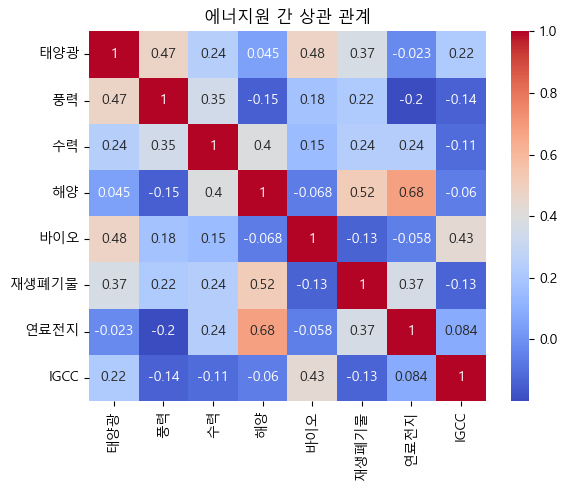

In [124]:
sns.heatmap(df[['태양광', '풍력', '수력', '해양', '바이오', '재생폐기물', '연료전지', 'IGCC']].corr(), annot=True, cmap='coolwarm')
plt.title('에너지원 간 상관 관계')
plt.show()
